In [202]:
import pandas as pd
import numpy as np
pd.options.display.max_rows=1000
import matplotlib.pyplot as plt
% pylab inline
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


Populating the interactive namespace from numpy and matplotlib


In [62]:
features=pd.read_table("C:/Users/lbisht/Documents/Thinkful/Decision tree/from git/har/har/UCI HAR Dataset/features.txt", 
                      sep = ' ',
                         header = None,
                         index_col=None).iloc[:,1]

In [37]:
print(features.head())
print(type(features))

0    tBodyAcc-mean()-X
1    tBodyAcc-mean()-Y
2    tBodyAcc-mean()-Z
3     tBodyAcc-std()-X
4     tBodyAcc-std()-Y
Name: 1, dtype: object
<class 'pandas.core.series.Series'>


In [64]:
#map and lambda
lambdaUpdate=lambda x:  str(x).replace('(', '') \
                    .replace(')', '')\
                    .replace('-', '')\
                    .replace(',', '')\
                    .replace('Body', '')\
                    .replace('Mag', '')\
                    .replace('std', 'STD')\
                    .replace('mean', 'Mean')
features_neat=list(map(lambdaUpdate, features) )


In [63]:
print(features)

0                         tBodyAcc-mean()-X
1                         tBodyAcc-mean()-Y
2                         tBodyAcc-mean()-Z
3                          tBodyAcc-std()-X
4                          tBodyAcc-std()-Y
5                          tBodyAcc-std()-Z
6                          tBodyAcc-mad()-X
7                          tBodyAcc-mad()-Y
8                          tBodyAcc-mad()-Z
9                          tBodyAcc-max()-X
10                         tBodyAcc-max()-Y
11                         tBodyAcc-max()-Z
12                         tBodyAcc-min()-X
13                         tBodyAcc-min()-Y
14                         tBodyAcc-min()-Z
15                           tBodyAcc-sma()
16                      tBodyAcc-energy()-X
17                      tBodyAcc-energy()-Y
18                      tBodyAcc-energy()-Z
19                         tBodyAcc-iqr()-X
20                         tBodyAcc-iqr()-Y
21                         tBodyAcc-iqr()-Z
22                     tBodyAcc-

In [65]:
X_train=pd.read_table('C:/Users/lbisht/Documents/Thinkful/Decision tree/from git/har/har/UCI HAR Dataset/train/X_train.txt',
                     sep=r"\s+",# separate on various amount of whitespaces 
                      header=None)
X_test=pd.read_table('C:/Users/lbisht/Documents/Thinkful/Decision tree/from git/har/har/UCI HAR Dataset/test/X_test.txt'
                    , sep=r"\s+",
                    header=None)
X_train.columns, X_test.columns=features_neat, features_neat 

In [66]:
print(X_test.head())

   tAccMeanX  tAccMeanY  tAccMeanZ  tAccSTDX  tAccSTDY  tAccSTDZ  tAccmadX  \
0   0.257178  -0.023285  -0.014654 -0.938404 -0.920091 -0.667683 -0.952501   
1   0.286027  -0.013163  -0.119083 -0.975415 -0.967458 -0.944958 -0.986799   
2   0.275485  -0.026050  -0.118152 -0.993819 -0.969926 -0.962748 -0.994403   
3   0.270298  -0.032614  -0.117520 -0.994743 -0.973268 -0.967091 -0.995274   
4   0.274833  -0.027848  -0.129527 -0.993852 -0.967445 -0.978295 -0.994111   

   tAccmadY  tAccmadZ  tAccmaxX        ...          fGyroJerkMeanFreq  \
0 -0.925249 -0.674302 -0.894088        ...                   0.071645   
1 -0.968401 -0.945823 -0.894088        ...                  -0.401189   
2 -0.970735 -0.963483 -0.939260        ...                   0.062891   
3 -0.974471 -0.968897 -0.938610        ...                   0.116695   
4 -0.965953 -0.977346 -0.938610        ...                  -0.121711   

   fGyroJerkskewness  fGyroJerkkurtosis  angletAccMeangravity  \
0          -0.330370       

In [95]:
# Remove duplicate columns
unique_features=[]
for i in range(len(features_neat)):
    if features_neat[i] not in unique_features:
        unique_features.append(features_neat[i])
X_train_clean=X_train.loc[:,features_neat]
X_test_clean=X_test.loc[:,features_neat]
print(len(unique_features))
print(X_train.head())

469
   tAccMeanX  tAccMeanY  tAccMeanZ  tAccSTDX  tAccSTDY  tAccSTDZ  tAccmadX  \
0   0.288585  -0.020294  -0.132905 -0.995279 -0.983111 -0.913526 -0.995112   
1   0.278419  -0.016411  -0.123520 -0.998245 -0.975300 -0.960322 -0.998807   
2   0.279653  -0.019467  -0.113462 -0.995380 -0.967187 -0.978944 -0.996520   
3   0.279174  -0.026201  -0.123283 -0.996091 -0.983403 -0.990675 -0.997099   
4   0.276629  -0.016570  -0.115362 -0.998139 -0.980817 -0.990482 -0.998321   

   tAccmadY  tAccmadZ  tAccmaxX        ...          fGyroJerkMeanFreq  \
0 -0.983185 -0.923527 -0.934724        ...                  -0.074323   
1 -0.974914 -0.957686 -0.943068        ...                   0.158075   
2 -0.963668 -0.977469 -0.938692        ...                   0.414503   
3 -0.982750 -0.989302 -0.938692        ...                   0.404573   
4 -0.979672 -0.990441 -0.942469        ...                   0.087753   

   fGyroJerkskewness  fGyroJerkkurtosis  angletAccMeangravity  \
0          -0.298676   

In [98]:
#Remove band features
basic_features=[]
basic_features=[f for idx, f in enumerate(unique_features) if ('band' not in f)]
print(len(basic_features))
X_train_clean=X_train_clean.loc[:, basic_features]
X_test_clean=X_test_clean.loc[:,basic_features]
#print(X_train.head())

427


In [194]:
Y_train=pd.read_table("C:/Users/lbisht/Documents/Thinkful/Decision tree/from git/har/har/UCI HAR Dataset/train/y_train.txt", 
                      sep = ' ',
                         header = None,
                         index_col=None)
Y_test=pd.read_table("C:/Users/lbisht/Documents/Thinkful/Decision tree/from git/har/har/UCI HAR Dataset/test/y_test.txt", 
                      sep = ' ',
                         header = None,
                         index_col=None)
Y_labels=pd.read_table("C:/Users/lbisht/Documents/Thinkful/Decision tree/from git/har/har/UCI HAR Dataset/activity_labels.txt", 
                      sep = ' ',
                         header = None,
                         index_col=None)

y_train_labeled=pd.merge(Y_train, Y_labels, how='left', left_on=0, right_on=0)
y_test_labeled=pd.merge(Y_test, Y_labels, how='left', left_on=0, right_on=0)
print(y_train_labeled.head())
y_train_labeled.columns=['int_lab', 'str_lab']
y_test_labeled.columns=['int_lab', 'str_lab']
print(Y_train.head())
print(Y_labels.head())
print(np.unique(y_train_labeled.str_lab))

   0         1
0  5  STANDING
1  5  STANDING
2  5  STANDING
3  5  STANDING
4  5  STANDING
   0
0  5
1  5
2  5
3  5
4  5
   0                   1
0  1             WALKING
1  2    WALKING_UPSTAIRS
2  3  WALKING_DOWNSTAIRS
3  4             SITTING
4  5            STANDING
['LAYING' 'SITTING' 'STANDING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']


In [116]:
#Conversion of response to categorial
y_train_labeled.int_lab=y_train_labeled.int_lab.astype('category')
y_test_labeled.int_lab=y_test_labeled.int_lab.astype('category')

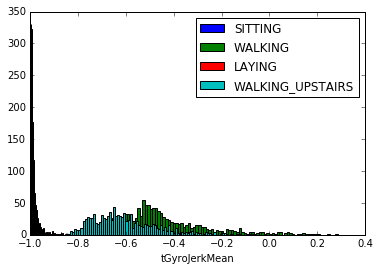

In [144]:
def histplot(feature, label):
    X=X_train_clean.loc[y_train_labeled.str_lab==label, feature].values
    plt.hist(X,  100, label=label)
    plt.legend()
    plt.xlabel(feature)

histplot('tGyroJerkMean','SITTING')
histplot('tGyroJerkMean','WALKING')
histplot('tGyroJerkMean','LAYING')
histplot('tGyroJerkMean','WALKING_UPSTAIRS')




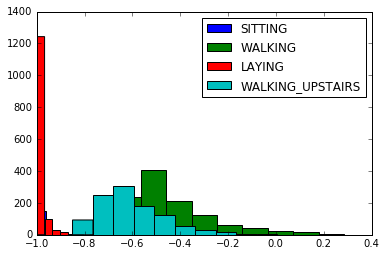

In [162]:
def plot_hist(activity, feature):
    X=X_train_clean.loc[y_train_labeled.str_lab==activity, feature].values
    plt.hist(X, orientation='vertical', label=activity)
    plt.legend()
plot_hist('SITTING', 'tGyroJerkMean')
plot_hist('WALKING','tGyroJerkMean')
plot_hist('LAYING','tGyroJerkMean')
plot_hist('WALKING_UPSTAIRS','tGyroJerkMean')

In [185]:
np.ravel(Y_train)
Y_train

,int_lab,str_lab
0,5,STANDING
1,5,STANDING
2,5,STANDING
3,5,STANDING
4,5,STANDING
5,5,STANDING
6,5,STANDING
7,5,STANDING
8,5,STANDING
9,5,STANDING


In [205]:
classification_report?

In [224]:
X_pca=PCA(n_components=2).fit_transform(X_train_clean)
print(X_pca[1:5])


[[-5.59915279 -0.09998149]
 [-5.53982383  0.30157078]
 [-5.74559394  0.91513706]
 [-5.82027186  1.19159774]]


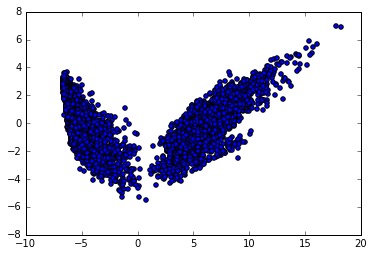

In [182]:
plt.scatter(X_pca[:,0], X_pca[:,1], cmap=plt.cm.Paired)

In [195]:
classifier_all=rf(n_estimators=500)
classifier_all.fit(X_train_clean, np.ravel(Y_train))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [206]:
y_test_predict=classifier_all.predict(X_test_clean)
print(confusion_matrix(y_test_predict, Y_test))
print(accuracy_score(Y_test, y_test_predict))
print(classification_report(Y_test, y_test_predict))

[[485  31  21   0   0   0]
 [  4 434  42   0   0   0]
 [  7   6 357   0   0   0]
 [  0   0   0 431  50   0]
 [  0   0   0  60 482   0]
 [  0   0   0   0   0 537]]
0.925008483203
             precision    recall  f1-score   support

          1       0.90      0.98      0.94       496
          2       0.90      0.92      0.91       471
          3       0.96      0.85      0.90       420
          4       0.90      0.88      0.89       491
          5       0.89      0.91      0.90       532
          6       1.00      1.00      1.00       537

avg / total       0.93      0.93      0.92      2947



In [207]:
classifier_PCA=rf(n_estimators=500)
classifier_PCA.fit(X_pca, np.ravel(Y_train))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [225]:
X_test_pca=PCA(n_components=2).fit_transform(X_test_clean)

In [226]:
y_PCA_predict=classifier_PCA.predict(X_test_pca)
confusion_matrix(Y_test, y_PCA_predict)
print(classification_report(Y_test, y_PCA_predict))
print(accuracy_score(Y_test, y_PCA_predict))

             precision    recall  f1-score   support

          1       0.46      0.79      0.58       496
          2       0.76      0.28      0.40       471
          3       0.53      0.46      0.49       420
          4       0.29      0.25      0.27       491
          5       0.47      0.34      0.39       532
          6       0.38      0.53      0.44       537

avg / total       0.48      0.44      0.43      2947

0.442144553784
